## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.interpolate

## Importing Data and Preparing for Training + Visualization

In [2]:
data = pd.read_csv('sample_data.csv')

data = data.drop(data.columns[0], axis=1) # dropping the first column
data

,Xcoordinate,Ycoordinate,Facies,Porosity,Permeability,Acoustic_Impedance
0,50,900,1,0.220761,140.021266,3413.063944
1,50,850,1,0.237154,39.837129,3074.562617
2,50,800,1,0.234352,84.992437,2292.783358
3,50,750,1,0.244553,90.632307,2494.848885
4,50,700,1,0.231787,811.547979,2522.063995
...,...,...,...,...,...,...
475,190,279,1,0.184878,102.302063,5242.761918
476,760,329,0,0.165932,2.520797,3827.007628
477,530,759,0,0.164929,91.415787,4042.577607
478,360,979,1,0.222321,829.200622,3242.862048


In [3]:
Sandstone = data.loc[data['Facies'] == 1]
Shale = data.loc[data['Facies'] == 0]

def remove_outliers(df, column_name):
    
    # calculating Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # calculating interquartile range(IQR)
    IQR = Q3 - Q1
    
    # using Tukey 1.5 IQR 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # removing outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df
    
Sandstone = remove_outliers(Sandstone, 'Acoustic_Impedance')
Shale = remove_outliers(Shale, 'Acoustic_Impedance')

data = pd.concat([Sandstone, Shale]).sort_index()
data

,Xcoordinate,Ycoordinate,Facies,Porosity,Permeability,Acoustic_Impedance
0,50,900,1,0.220761,140.021266,3413.063944
1,50,850,1,0.237154,39.837129,3074.562617
2,50,800,1,0.234352,84.992437,2292.783358
3,50,750,1,0.244553,90.632307,2494.848885
4,50,700,1,0.231787,811.547979,2522.063995
...,...,...,...,...,...,...
474,760,529,0,0.170450,11.400363,4241.619853
476,760,329,0,0.165932,2.520797,3827.007628
477,530,759,0,0.164929,91.415787,4042.577607
478,360,979,1,0.222321,829.200622,3242.862048


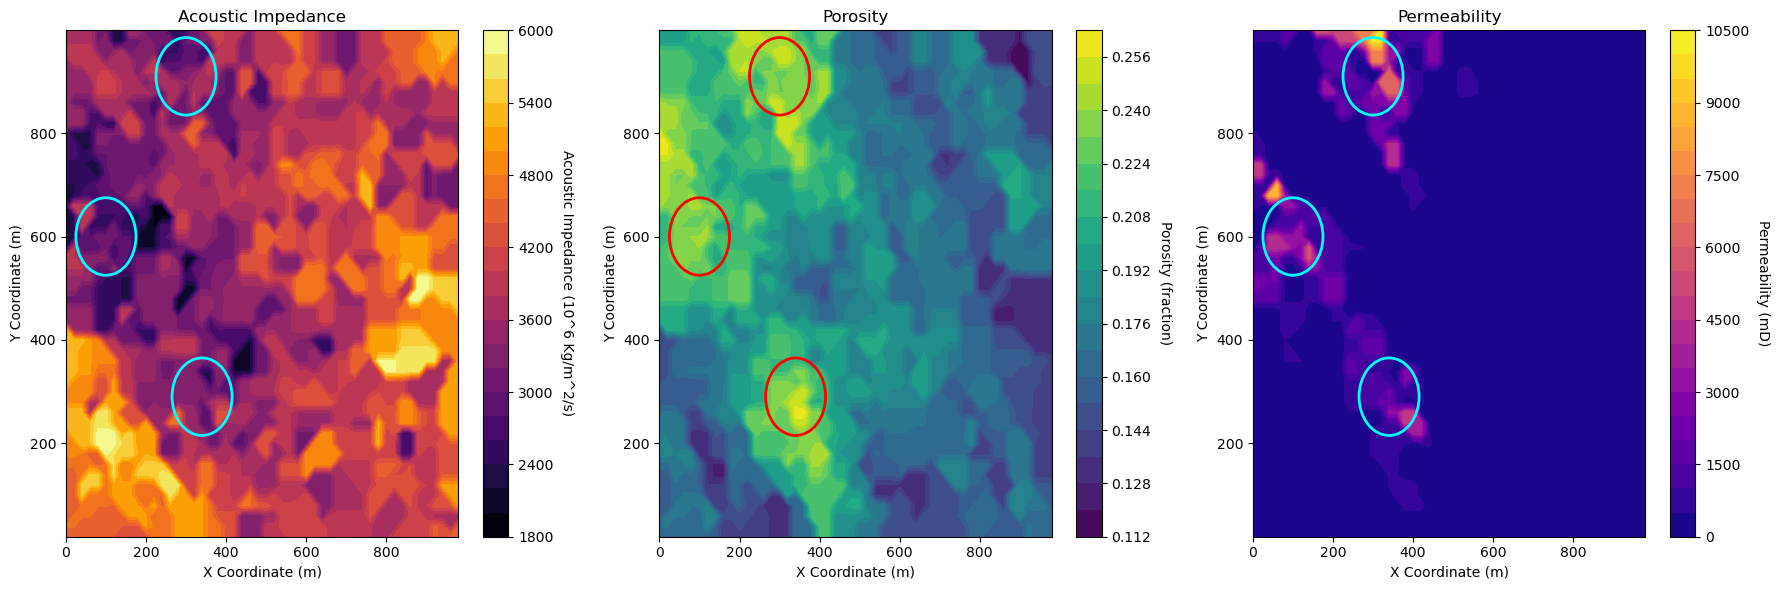

In [4]:
Xcoord = data['Xcoordinate'].values
Ycoord = data['Ycoordinate'].values
porosity = data['Porosity'].values
permeability = data['Permeability'].values
acoustic_impedance = data['Acoustic_Impedance'].values

# x_min, x_max = 0, 1000
# y_min, y_max = 0, 1000
x_min, x_max = np.min(Xcoord), np.max(Xcoord)
y_min, y_max = np.min(Ycoord), np.max(Ycoord)

x_grid = np.linspace(x_min, x_max, 50)
y_grid = np.linspace(y_min, y_max, 50)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

acoustic_impedance_grid = scipy.interpolate.griddata((Xcoord, Ycoord), acoustic_impedance, (X_grid, Y_grid), method='nearest')
porosity_grid = scipy.interpolate.griddata((Xcoord, Ycoord), porosity, (X_grid, Y_grid), method='nearest')
permeability_grid = scipy.interpolate.griddata((Xcoord, Ycoord), permeability, (X_grid, Y_grid), method='nearest')

circle_params = [
    (300, 910, 75),  # Circle 1 at (300,925) with radius 75
    (340, 290, 75),  # Circle 2 at (340,290) with radius 75
    (100, 600, 75)   # Circle 3 at (100,600) with radius 75
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ai_contour = axes[0].contourf(X_grid, Y_grid, acoustic_impedance_grid, levels=20, cmap='inferno')
ai_cbar = fig.colorbar(ai_contour, ax=axes[0], label='Acoustic Impedance (10^6 Kg/m^2/s)')
ai_cbar.ax.set_ylabel('Acoustic Impedance (10^6 Kg/m^2/s)', rotation=270, labelpad = 15)
# axes[0].scatter(X, Y, c=acoustic_impedance, cmap='inferno', edgecolors='k', alpha=0.7)
axes[0].set_title('Acoustic Impedance')
axes[0].set_xlabel('X Coordinate (m)')
axes[0].set_ylabel('Y Coordinate (m)')

for (x_center, y_center, radius) in circle_params:
    circle = patches.Circle((x_center, y_center), radius, edgecolor='cyan', facecolor='none', linewidth=2)
    axes[0].add_patch(circle)

porosity_contour = axes[1].contourf(X_grid, Y_grid, porosity_grid, levels=20, cmap='viridis')
porosity_cbar = fig.colorbar(porosity_contour, ax=axes[1], label='Porosity (fraction)')
porosity_cbar.ax.set_ylabel('Porosity (fraction)', rotation=270, labelpad = 15)
# axes[1].scatter(X, Y, c=porosity, cmap='viridis', edgecolors='k', alpha=0.7)
axes[1].set_title('Porosity')
axes[1].set_xlabel('X Coordinate (m)')
axes[1].set_ylabel('Y Coordinate (m)')

for (x_center, y_center, radius) in circle_params:
    circle = patches.Circle((x_center, y_center), radius, edgecolor='red', facecolor='none', linewidth=2)
    axes[1].add_patch(circle)

permeability_contour = axes[2].contourf(X_grid, Y_grid, permeability_grid, levels=20, cmap='plasma')
permeability_cbar = fig.colorbar(permeability_contour, ax=axes[2], label='Permeability (mD)')
permeability_cbar.ax.set_ylabel('Permeability (mD)', rotation=270, labelpad = 15)
# axes[2].scatter(X, Y, c=permeability, cmap='plasma', edgecolors='k', alpha=0.7)
axes[2].set_title('Permeability')
axes[2].set_xlabel('X Coordinate (m)')
axes[2].set_ylabel('Y Coordinate (m)')

for (x_center, y_center, radius) in circle_params:
    circle = patches.Circle((x_center, y_center), radius, edgecolor='cyan', facecolor='none', linewidth=2)
    axes[2].add_patch(circle)
    
plt.tight_layout()
plt.show()

In [5]:
X = data[["Acoustic_Impedance", "Xcoordinate", "Ycoordinate"]]
Y = data["Porosity"]
# X = X.to_numpy()
# Y = Y.to_numpy()
X = X.values # already a 2D array with shape (no. of samples, 2)
Y = Y.values.reshape(-1,1) # turning into a 2D array with shape (no. of sample, 1)

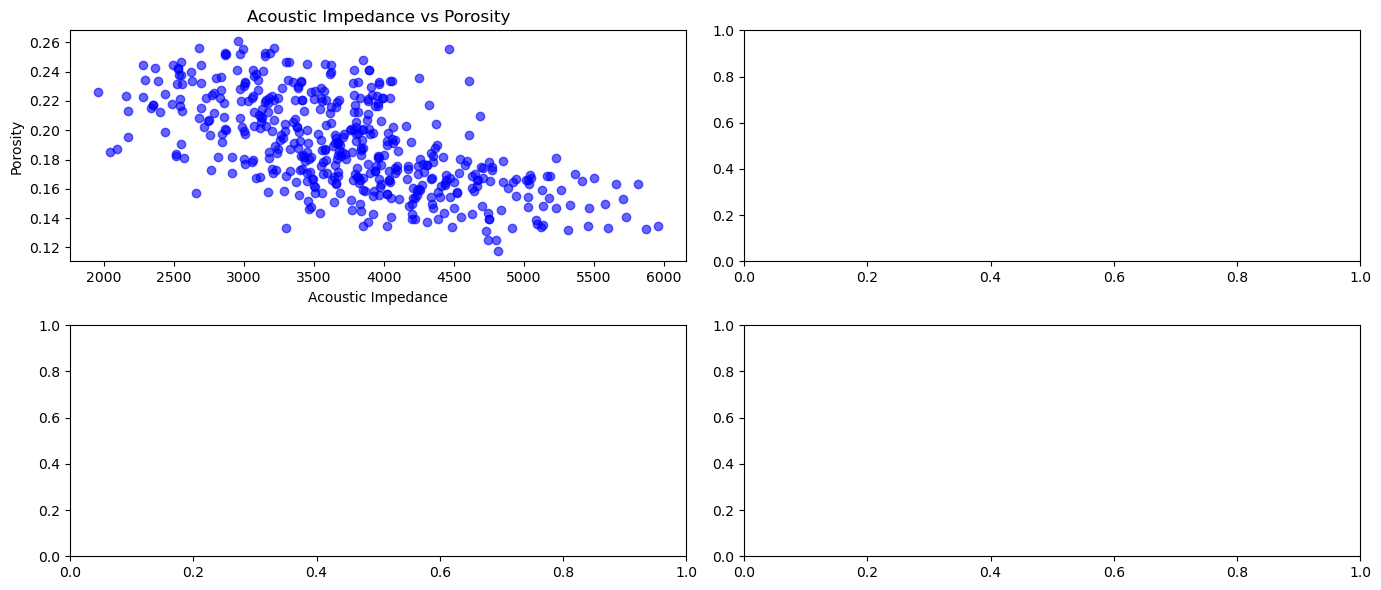

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

axes[0,0].scatter(X[:, 0], Y, color='blue', alpha=0.6)
axes[0,0].set_title('Acoustic Impedance vs Porosity')
axes[0,0].set_xlabel('Acoustic Impedance')
axes[0,0].set_ylabel('Porosity')

plt.tight_layout()
plt.show()

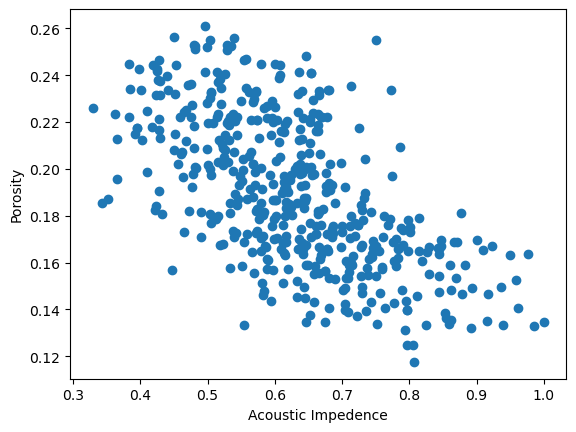

In [7]:
max_acoustic_impedance = X[:, 0].max()
X[:, 0] /= max_acoustic_impedance # scaling acuostic impedance

max_coord = max(X[:, 1].max(), X[:, 2].max())
X[:, 1] /= max_coord # scaling Xcoordinate
X[:, 2] /= max_coord # scaling Ycoordiante

plt.scatter(X[:, 0], Y)
plt.xlabel("Acoustic Impedence")
plt.ylabel("Porosity")
plt.show()

## Splitting Data + Visualization

In [8]:
def datasplit(X, Y, train_size=0.6, validation_size=0.2, test_size=0.2):
    
    assert train_size + validation_size + test_size == 1.0

    total_samples = X.shape[0]
    training = int(train_size * total_samples)
    validation = int(validation_size * total_samples)
    test = total_samples - (training + validation)

    X_train = X[:training].T
    Y_train = Y[:training].T

    X_val = X[training:training+validation].T
    Y_val = Y[training:training+validation].T

    X_test = X[training+validation:].T
    Y_test = Y[training+validation:].T

    print(f"X_train shape: {X_train.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    print(f"Y_val shape: {Y_val.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_test shape: {Y_test.shape}")

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

X_train, Y_train, X_val, Y_val, X_test, Y_test = datasplit(X, Y)

X_train shape: (3, 284)
Y_train shape: (1, 284)
X_val shape: (3, 94)
Y_val shape: (1, 94)
X_test shape: (3, 96)
Y_test shape: (1, 96)


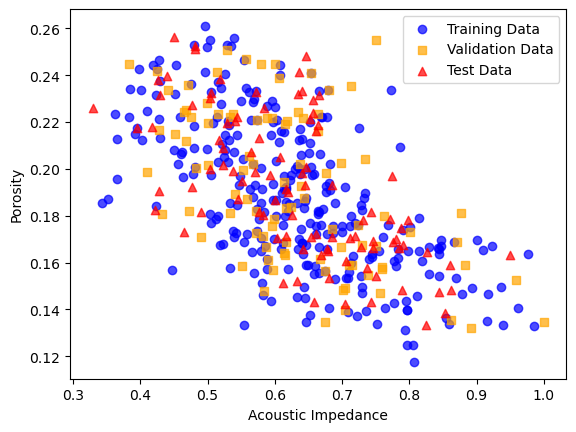

In [9]:
def plot_datasplit(X, Y, X_train, Y_train, X_val, Y_val, X_test, Y_test):
    
    
    plt.scatter(X_train[0, :], Y_train[0, :], color='blue', marker='o', label='Training Data', alpha=0.7)
    plt.scatter(X_val[0, :], Y_val[0, :], color='orange', marker='s', label='Validation Data', alpha=0.7)
    plt.scatter(X_test[0, :], Y_test[0, :], color='red', marker='^', label='Test Data', alpha=0.7)

    plt.xlabel("Acoustic Impedance")
    plt.ylabel("Porosity")
    # plt.title("Data Split Visualization")
    plt.legend(loc='best')
    plt.show()

plot_datasplit(X, Y, X_train, Y_train, X_val, Y_val, X_test, Y_test)

## Initializing Neural Network Paramters

In [10]:
def initialize_parameters(layers):
    parameters = {}
    L = len(layers) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers[l], layers[l-1])*np.sqrt(2/layers[l-1]) # using He initialization for weights
        parameters["b" + str(l)] = np.zeros((layers[l], 1)) # using zeros to initizalize biases
        
        assert(parameters['W' + str(l)].shape == (layers[l], layers[l - 1]))
        assert(parameters['b' + str(l)].shape == (layers[l], 1))
        
    return parameters

## Forward Pass

In [11]:
def forward_linear (A, W, b):
    Z = np.dot(W,A) + b # linear transformation
    cache = (A, W, b) # storing input and parameters for backpropagation
    return Z, cache

## ReLU Activation

In [12]:
def relu(Z):
    A = np.maximum(0,Z) # setting any negative values to 0 for ReLU
    
    assert(A.shape == Z.shape)
    
    cache = Z # storing input and parameters for backpropagation
    return A, cache

## Forward Propagation (Activation)

In [13]:
def forward_linear_activation(A_prev, W, b):
    Z, linear_cache = forward_linear(A_prev, W, b) # linear transformation + storing input and paramters for backprpagation
    A, activation_cache = relu(Z) # applying ReLU activation
    cache = (linear_cache, activation_cache) # storing inputs and parameters for linear transformation, and activation output for backpropagation
    return A, cache

## Compute Cost Function

In [14]:
def compute_cost(AL, Y, parameters):
    m = Y.shape[1]
    cost = np.sum((AL-Y)**2)/(2*m) # Mean Squared Error (MSE) between predicted output (AL) and actual values (Y)
    total_cost = np.squeeze(cost) # squeezing to remove any unnecessary dimensions (might be itself unnecessary)
    return total_cost

## ReLU Backward Propagation

In [15]:
def relu_backward(dA, cache):
    Z = cache # retrieving output of linear transformation
    dZ = np.array(dA, copy=True) # creating a copy of loss gradient wrt activation ouput
    dZ[Z <= 0] = 0 # loss gradient wrt activation input (applying derivative of ReLU)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

## Backward Propagation (Linear Layer)

In [16]:
def backward_linear(dZ, cache):
    A_prev, W, b = cache # retrieving inputs and parameters
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m # gradient of loss wrt weights (chain rule)
    db = np.sum(dZ, axis = 1, keepdims = True)/m # gradient of loss wrt biases (summing over examples and normalizting)
    dA_prev = np.dot(W.T,dZ) # gradient of loss wrt input activation (multiplying transposed weights by copy of gradient wrt activation ouput
    return dA_prev, dW, db

## Backward Propagation (Activation)

In [17]:
def backward_linear_activation(dA, cache):
    linear_cache, activation_cache = cache # unpacking
    dZ = relu_backward(dA, activation_cache) # gradient of loss wrt activation input
    dA_prev, dW, db = backward_linear(dZ, linear_cache) # loss gradients wrt inputs and parameters
    return dA_prev, dW, db

## Parameter Update

In [18]:
def update_parameters(params, grads, learning_rate):
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in neural network (parameters contains W and b)

    # looping through each layer to update weights and biases using gradient descent
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l + 1)]
        
    return parameters

## Forward Propagation (Neural Network)

In [19]:
def model_forward(X, parameters):
    caches = []
    A = X # starting with X as the intial activation input
    L = len(parameters) // 2 # number of layers in the neural network (parameters contains W and b)

    # looping through each layer (except  final one)
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_linear_activation(A_prev, parameters["W" + str(l)], parameters["b" + str(l)])
        caches.append(cache)
        
    # forward pass for final layer
    AL, cache = forward_linear_activation(A, parameters["W" + str(L)], parameters["b" + str(L)])
    caches.append(cache)
    
    return AL, caches

## Backward Propagation (Neural Network)

In [20]:
def model_backward(AL, Y, caches):
    grads = {} # empty dictionary to store gradients
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # Y should have the same shape as AL for element-wise subtraction
    dAL = AL-Y  # initial loss gradient wrt final activation output

    # backward pass for final layer
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = backward_linear_activation(dAL, current_cache)
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    # looping through preceding layers in reverse order
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backward_linear_activation(grads['dA' + str(l + 1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

## Neural Network Training

In [21]:
def layer_model(X, Y, layers, validation_data = None, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    np.random.seed(100) # setting random seed number for reproducibility
    costs = []
    val_costs = []
    parameters = initialize_parameters(layers)

    # extracting validation data (if available)
    if validation_data is not None:
        X_val, Y_val = validation_data
    else:
        X_val, Y_val = None, None

    # looping to train for specified number of iterations
    for i in range(0, num_iterations):
        AL, caches = model_forward(X, parameters) # forward pass through network computing activations
        cost = compute_cost(AL, Y, parameters) # computing cost for current iteration
        grads = model_backward(AL, Y, caches) # backward propagation to colculate gradients
        parameters = update_parameters(parameters, grads, learning_rate) # updating parameters based on computed gradients

    # appending costs to their respective lists at every 100 iterations
        if i % 100 == 0:
            costs.append(cost) 
            if validation_data is not None:
                AL_val, _ = model_forward(X_val, parameters)
                val_cost = compute_cost(AL_val, Y_val, parameters)
                val_costs.append(val_cost)  # Append validation cost

    # plotting training and validation costs
    plt.plot(np.arange(0, num_iterations, 100), costs, label="Training Cost")
    if validation_data is not None:
        plt.plot(np.arange(0, num_iterations, 100), val_costs, label="Validation Cost")
    plt.ylabel('Cost')
    plt.xlabel('Iterations')
    plt.legend()
    plt.show()

    # calculating RMSE
    Final_Train_RMSE = np.sqrt(costs[-1])
    print(f"Training RMSE is {Final_Train_RMSE}")
    Final_Val_RMSE = np.sqrt(val_costs[-1])
    print(f"Validation RMSE is {Final_Val_RMSE}")

    # plotting actual vs. predicted values 
    plt.scatter(X[0,:],Y[0,:], marker='o', c='r', label="Actual Value", s = 50)
    plt.scatter(X[0,:],AL[0,:], marker='o',label="Predicted Value", s = 50)
    plt.xlabel("Acoustic Impedance")
    plt.ylabel("Porosity")
    plt.legend()
    plt.show()

    # # printing final values of weights and biases after training
    # for i in range(1, len(layers)):
    #     print(f"Final Value of W{i}:\n{parameters['W' + str(i)]}")
    #     print(f"Final Value of b{i}:\n{parameters['b' + str(i)]}")
    #     print(f"Shape of W{i}: {parameters['W' + str(i)].shape}")
    #     print(f"Shape of b{i}: {parameters['b' + str(i)].shape}")

    return parameters, costs, val_costs

## Configuration and Training Execution

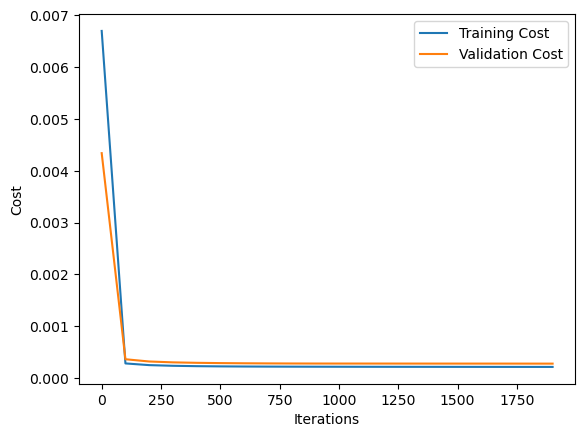

Training RMSE is 0.014682604349693165
Validation RMSE is 0.01670493065764178


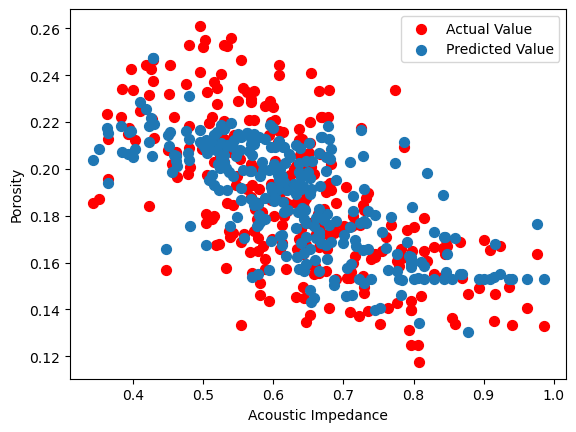

In [22]:
# defining neural network archicture 
layers = [X_train.shape[0], 2, 3, 3, Y_train.shape[0]] # [input_size, hidden_layer_1_size, hidden_layer_2_size, ..., output_size]
# training model with given architecture
parameters, costs, validation_costs = layer_model(X_train, Y_train, layers, validation_data = (X_val, Y_val), learning_rate=0.3, num_iterations = 2000, print_cost = True)

In [25]:
def model_test(X_test, Y_test, parameters):
    AL_test, _ = model_forward(X_test, parameters)
    
    cost = compute_cost(AL_test, Y_test, parameters)
    Test_RMSE = np.sqrt(cost)

    df = pd.DataFrame({"Actual Porosity": Y_test.squeeze(), "Predicted Porosity": AL_test.squeeze()})
    display(df)
    
    print("Testing Cost is " + str(cost))
    print(f"Testing RMSE is {Test_RMSE}")

    # unscaling and plotting
    unscaled_acoustic_impedance = X_test[0, :] * data[["Acoustic_Impedance"]].max().values # unscaling acuostic impedance
    
    max_Xcoord = data["Xcoordinate"].max()
    max_Ycoord = data["Ycoordinate"].max()
    max_XYcoord = max(max_Xcoord, max_Ycoord)
    X_coord = X_test[1, :] * max_XYcoord # unscaling Xcoordinate
    Y_coord = X_test[2, :] * max_XYcoord # unscaling Ycoordiante    

    x_min, x_max = np.min(Xcoord), np.max(Xcoord)
    y_min, y_max = np.min(Ycoord), np.max(Ycoord)

    x_grid = np.linspace(x_min, x_max, 50)
    y_grid = np.linspace(y_min, y_max, 50)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    
    actual_porosity_grid = scipy.interpolate.griddata((X_coord, Y_coord), Y_test.flatten(), (X_grid, Y_grid), method='nearest')
    predicted_porosity_grid = scipy.interpolate.griddata((X_coord, Y_coord), AL_test.flatten(), (X_grid, Y_grid), method='nearest')

    fig, axes = plt.subplots(1, 3, figsize=(14, 6))

    axes[0].scatter(unscaled_acoustic_impedance, AL_test, marker='o', label="Predicted Porosity", s=50)
    axes[0].scatter(unscaled_acoustic_impedance, Y_test, marker='o', c='r', label="Actual Porosity", s=50)
    axes[0].set_title('Acoustic Impedance vs Porosity')
    axes[0].set_xlabel('Acoustic Impedance')
    axes[0].set_ylabel('Porosity')
    axes[0].legend(loc = 'best')
                   
    ai_contour = axes[1].contourf(X_grid, Y_grid, predicted_porosity_grid, levels=20, cmap='viridis')
    ai_cbar = fig.colorbar(ai_contour, ax=axes[1], label='Porosity (fraction)')
    ai_cbar.ax.set_ylabel('Porosity (fraction)', rotation=270, labelpad = 15)
    axes[1].set_title('Predicted Porosity')
    axes[1].set_xlabel('X Coordinate (m)')
    axes[1].set_ylabel('Y Coordinate (m)')
    
    ai_contour = axes[2].contourf(X_grid, Y_grid, actual_porosity_grid, levels=20, cmap='viridis')
    ai_cbar = fig.colorbar(ai_contour, ax=axes[2], label='Porosity (fraction)')
    ai_cbar.ax.set_ylabel('Porosity (fraction)', rotation=270, labelpad = 15)
    axes[2].set_title('Actual Porosity')
    axes[2].set_xlabel('X Coordinate (m)')
    axes[2].set_ylabel('Y Coordinate (m)')
    plt.tight_layout()
    plt.show()

    return AL_test

,Actual Porosity,Predicted Porosity
0,0.174678,0.166204
1,0.193201,0.192897
2,0.191565,0.209343
3,0.133299,0.156560
4,0.157845,0.153093
...,...,...
91,0.170450,0.165371
92,0.165932,0.173152
93,0.164929,0.175125
94,0.222321,0.216043


Testing Cost is 0.00020286478595803065
Testing RMSE is 0.01424306097571834


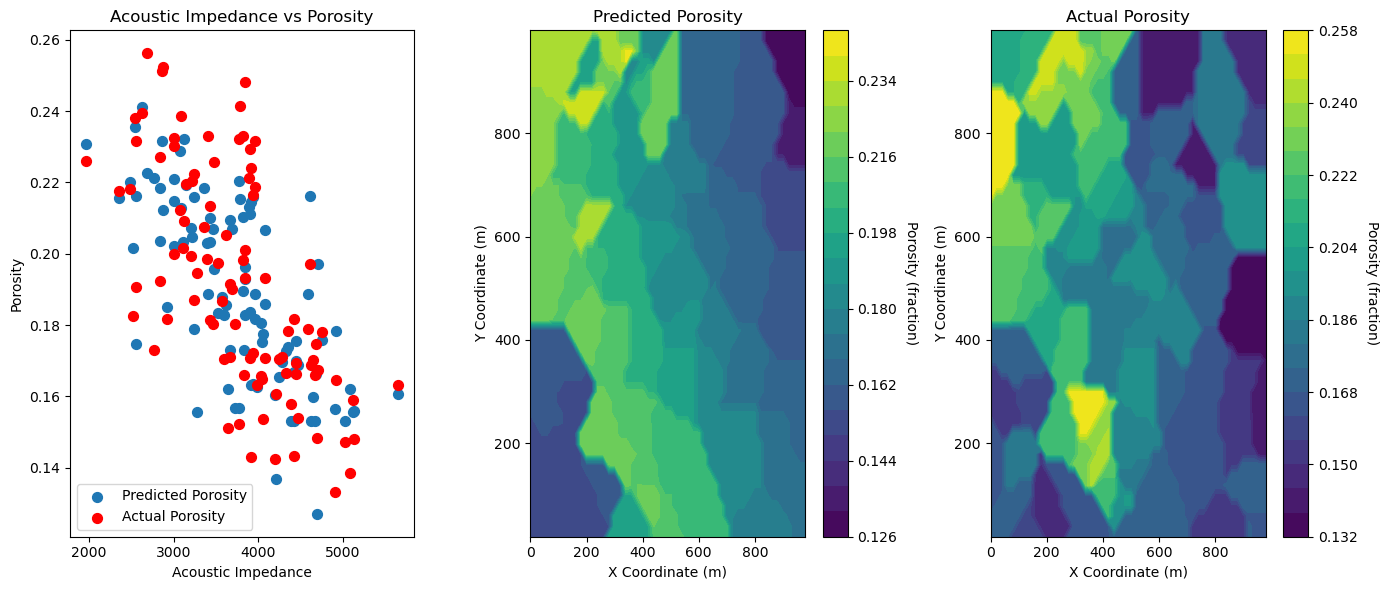

In [26]:
AL_test = model_test (X_test, Y_test, parameters)